In [1]:
import numpy as np
from sklearn.decomposition import IncrementalPCA
from tensorflow.keras.datasets import mnist

(x,_),(_,_)=mnist.load_data()
np.save("mnist_data.npy",x)

In [2]:
x_mmap=np.load("mnist_data.npy",mmap_mode='r')

n_components=154
n_batches=100
inc_pca=IncrementalPCA(n_components=n_components)
batch_size=x_mmap.shape[0]//n_batches

for i in range(n_batches):
    x_mmap_i=x_mmap[batch_size*i:batch_size*(i+1)].reshape(batch_size,-1)
    pca_variances=inc_pca.partial_fit(x_mmap_i)

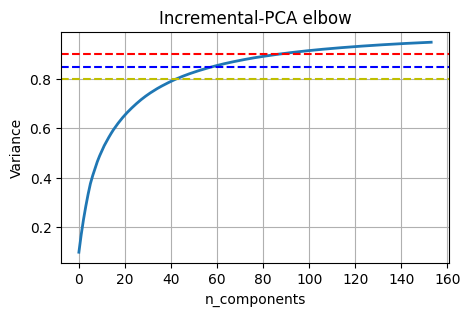

In [3]:
import matplotlib.pyplot as plt

cum=np.cumsum(pca_variances.explained_variance_ratio_)

plt.figure(figsize=(5,3))
plt.plot(cum,linewidth=2)
plt.axhline(y=0.9,color="r",linestyle="--")
plt.axhline(y=0.85,color="b",linestyle="--")
plt.axhline(y=0.8,color="y",linestyle="--")
plt.xlabel("n_components")
plt.ylabel("Variance")
plt.grid(True)
plt.title("Incremental-PCA elbow")
plt.show()